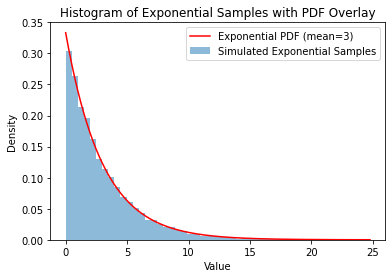

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
np.random.seed(20241113)

#==================== Use the inverse transformation method to Sample from Exp(𝜆) ====================#

# Set the mean of the exponential distribution
mean = 3
lambda_inv = mean  # Lambda is the inverse of the mean for exponential distribution

# Number of samples
n_samples = 10000

# Step 1: Generate uniform samples
unif_samples = np.random.uniform(0, 1, n_samples)

# Step 2: Transform using the inverse of the exponential CDF
exp_samples = -lambda_inv * np.log(1 - unif_samples)

# Step 3: Plotting
# Create a histogram of the exponential samples
plt.hist(exp_samples, bins=50, alpha=0.5, label='Simulated Exponential Samples', density=True)

# Overlay the theoretical PDF of the exponential distribution
x = np.linspace(0, max(exp_samples), 1000)
pdf = expon.pdf(x, scale=lambda_inv)  # scale = 1/lambda
plt.plot(x, pdf, 'r-', label=f'Exponential PDF (mean={mean})')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Exponential Samples with PDF Overlay')
plt.legend()

# Show the plot
plt.show()

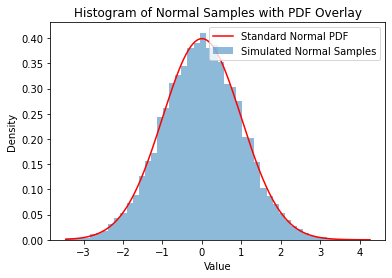

In [11]:
from scipy.stats import norm

#==================== Use the transformation method to Sample from N(0,1) ====================#

# Number of samples
n_samples = 10000

# Step 1: Generate uniform samples
unif_samples1 = np.random.uniform(0, 1, n_samples)
unif_samples2 = np.random.uniform(0, 1, n_samples)

# Step 2: Apply the transformation
norm_samples1 = np.sqrt(-2 * np.log(unif_samples1)) * np.cos(2 * np.pi * unif_samples2)
norm_samples2 = np.sqrt(-2 * np.log(unif_samples1)) * np.sin(2 * np.pi * unif_samples2)

# Step 3: Plotting
# Create a histogram of the normal samples
plt.hist(norm_samples1, bins=50, alpha=0.5, label='Simulated Normal Samples', density=True)

# Overlay the theoretical PDF of the exponential distribution
x = np.linspace(min(norm_samples1), max(norm_samples1), 1000)
pdf = norm.pdf(x, loc=0, scale=1)
plt.plot(x, pdf, 'r-', label=f'Standard Normal PDF')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Normal Samples with PDF Overlay')
plt.legend()

# Show the plot
plt.show()

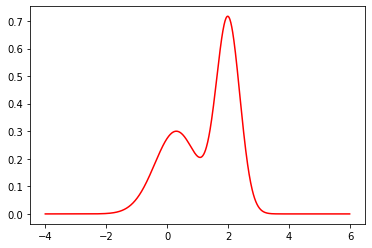

In [6]:
#==================== Example 4.6 ====================#
def fs(x):
    return 0.3 * np.exp(-(x-0.3) ** 2) + 0.7 * np.exp(-(x-2) ** 2 / 0.3)

x = np.arange(-4, 6, 0.01)

plt.plot(x, fs(x), color = 'red')

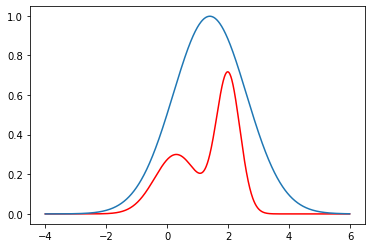

In [9]:
# Try to use a normal distribution to be the proposal distribution
def gs(x, mu, sigma, c):
    return c / np.sqrt(2 * np.pi * sigma**2) * np.exp(- (x - mu)**2 / (2 * sigma**2))

plt.plot(x, fs(x), color = 'red')
plt.plot(x, gs(x, 1.4, 1.2, 3)) # by trial and error
# This proposal distribution is not unique, and you can actually verify it covers the target function.

(array([5.39737397e-05, 0.00000000e+00, 1.79912466e-05, 1.43929973e-04,
        2.51877452e-04, 2.87859945e-04, 8.45588589e-04, 1.29536975e-03,
        2.41082704e-03, 4.69571535e-03, 7.82619226e-03, 1.24859251e-02,
        1.95564850e-02, 3.07650316e-02, 4.34488605e-02, 6.20518094e-02,
        8.28856729e-02, 1.09620665e-01, 1.38622555e-01, 1.65735363e-01,
        1.94161533e-01, 2.23487265e-01, 2.34767776e-01, 2.44141216e-01,
        2.47829421e-01, 2.37016682e-01, 2.19385261e-01, 1.97993668e-01,
        1.80398229e-01, 1.69189683e-01, 1.78994912e-01, 2.18359760e-01,
        2.87913919e-01, 3.82781762e-01, 4.95317009e-01, 5.66976144e-01,
        5.87432192e-01, 5.46664027e-01, 4.33912885e-01, 3.20963839e-01,
        2.01214102e-01, 1.12589221e-01, 5.55389782e-02, 2.55295789e-02,
        9.98514184e-03, 3.61624056e-03, 8.27597342e-04, 2.69868698e-04,
        1.07947479e-04, 3.59824931e-05]),
 array([-3.01290715, -2.87517375, -2.73744036, -2.59970697, -2.46197358,
        -2.32424019, 

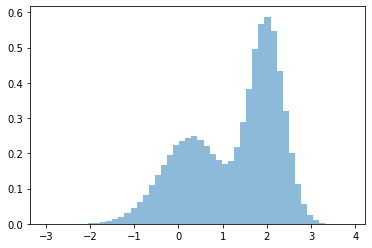

In [23]:
# Apply the rejection sampling technique
n_samples = 1000000
# Step I: sample from the proposal distribution
x_samples = np.random.normal(loc = 1.4, scale = 1.2, size = n_samples)

# Step II: sample from the uniform distribution
u_samples = np.random.uniform(0, 1, n_samples)

# Step III: compare ui with f(xi)/cg(xi) and decide whether to reject or not
accept_samples = x_samples[u_samples <= fs(x_samples) / gs(x_samples, 1.4, 1.2, 3)]
plt.hist(accept_samples, bins = 50, alpha=0.5, label='Simulated Samples from f*', density=True)